<a href="https://colab.research.google.com/github/RZDN/Complejidad_Algoritmica_RZD/blob/main/PC2_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import math
import heapq as hq

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [26]:
def PRIM(G, nombre):
    for u in G.nodes:
      G.nodes[u]['visited']= False
      G.nodes[u]['path'] = -1
      G.nodes[u]['cost'] = -1.0

    G.nodes[nombre]['cost'] = 0.0
    cola = [(0,nombre)]
    
    menor = 0
    while cola:
      _, n = hq.heappop(cola)
      if not G.nodes[n]['visited']:

        G.nodes[n]['visited'] = True

      for v in G.neighbors(n):

        if not G.nodes[v]['visited']:
          costo = G.edges[n, v]['weight']

          if G.nodes[v]['cost'] != -1 and costo < G.nodes[v]['cost']:
            G.nodes[v]['cost'] = costo      
            G.nodes[v]['path'] = n   
            hq.heappush(cola,(costo,v))  

          elif G.nodes[v]['cost'] == -1:
            G.nodes[v]['cost'] = costo 
            G.nodes[v]['path'] = n
            hq.heappush(cola,(costo,v))      
      
            
              
    P = nx.Graph()      
    path = [0]*G.number_of_nodes()
    prueba =[()]
    suma = 0
    for v, info in G.nodes.data():
      hq.heappush(prueba,(v,info['visited'], info['cost'], info['path']))
      P.add_edge(v,info['path'], weight = info['cost'])
      suma += info['cost']
   
    return suma

In [13]:
%%file 1.in
1 3 75
3 4 51
2 4 19
3 2 95
2 5 42
5 4 31
1 2 9
3 5 66

Writing 1.in


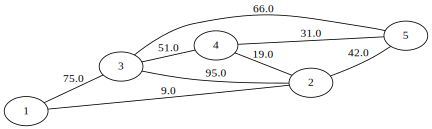

In [36]:
G = nx.read_weighted_edgelist('1.in', nodetype=int)
gs.nx2gv(G, weighted=True)

In [38]:
PRIM(G, 1)

110.0


In [32]:
%%file 2.in
1 2 4
1 8 8
2 8 11
3 2 8
8 9 7
8 7 1
7 9 6
9 3 2
3 4 7
3 6 4
7 6 2
4 6 14
4 5 9
5 6 10

Writing 2.in


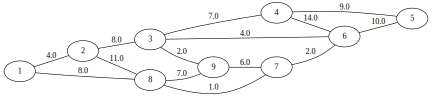

In [33]:
G = nx.read_weighted_edgelist('2.in', nodetype=int)
gs.nx2gv(G, weighted=True)

In [34]:
PRIM(G, 1)

37.0
